# Regresión lineal - Implementación

## Formula 

$ y = \theta_0 + \theta_1 x + \theta_2 x^2$

In [1]:
# Librerias

import matplotlib.pyplot as plt
import numpy as np


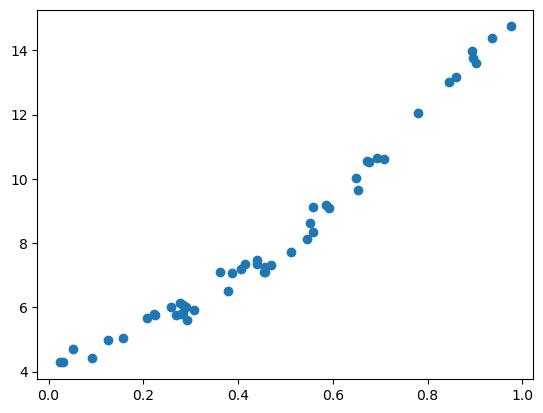

In [3]:
# Datos dummy
m = 50
np.random.seed(3)
x = np.sort(np.random.random(m))
y = 4 + (3 * x) + (8 * x * x) + np.random.random(m)

plt.plot(x,y,'o')
plt.show()

In [23]:
# Inicializar

theta0 = np.random.rand()
theta1 = np.random.rand()
theta2 = np.random.rand()
alpha    = 0.1  # Tasa de aprendizaje 
maxItera = 30000
i        = 0     

#para observar el progreso de los parametros abajo 
log0,log1,log2=np.array([theta0]),np.array([theta1]),np.array([theta2]) 

#para graficar el error cuadratico medio abajo
logE=np.array([])

In [24]:
# Ajuste de parámetros - Aprendizaje DG
while i < maxItera:
    # Observar / evaluar
    # yF = theta0 + theta1*x + theta2 * (x**2)
    yF = theta0 + theta1 * x + theta2 * (x**2)
    Error = yF - y
    
    # Actualizar
    nuevaT0 = theta0 - alpha * (1/m) * sum(Error)
    nuevaT1 = theta1 - alpha * (1/m) * sum(Error * x)
    nuevaT2 = theta2 - alpha * (1/m) * sum(Error * (x**2))
    
    theta0, theta1, theta2 = nuevaT0, nuevaT1, nuevaT2
    
    log0 = np.append(log0,theta0)
    log1 = np.append(log1,theta1)
    log2 = np.append(log2,theta2)
    
    logE = np.append(logE,sum(Error**2)/(2*m))

    i+= 1

In [25]:
[theta0 , theta1, theta2]

[4.325477718079113, 3.472637001002625, 7.803296297907131]

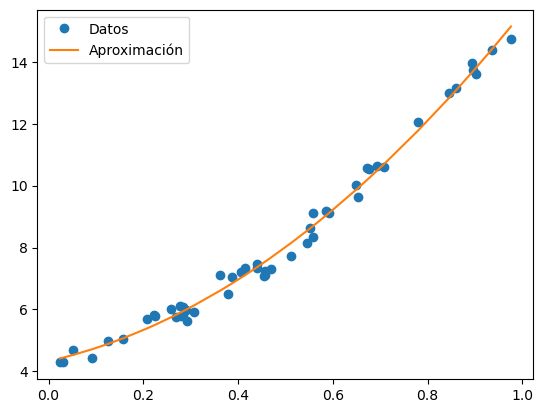

In [26]:
plt.plot(x,y,'o',label='Datos')
plt.plot(x,yF,label='Aproximación')
plt.legend()
plt.show()

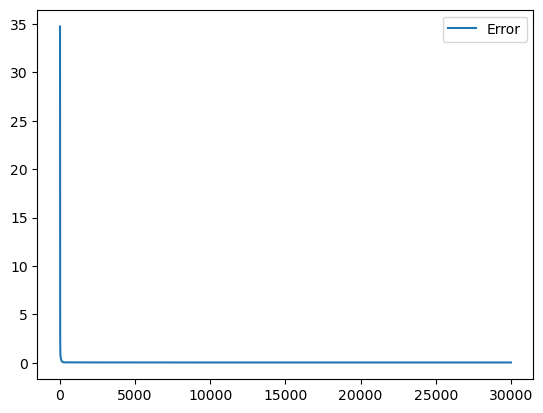

In [27]:
plt.plot(logE, label='Error')
plt.legend()
plt.show()

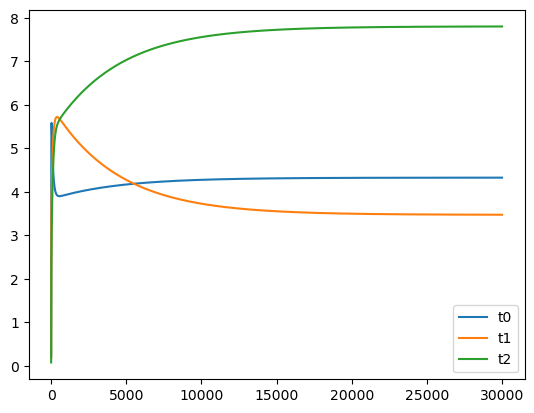

In [28]:
plt.plot(log0, label='t0')
plt.plot(log1, label='t1')
plt.plot(log2, label='t2')
plt.legend()
plt.show()

In [29]:
### Validando con sklearn
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

Xpoly = poly.fit_transform(xx)

modeloRL = linear_model.LinearRegression()
modeloRL.fit(Xpoly,yy)
print(" Modelo 1 Sklearn ")
print("theta0: ", modeloRL.intercept_)
print("theta1-2: ", modeloRL.coef_)


print(" Nuestro Modelo  ")
print("theta0: ", theta0)
print("theta1: ", theta1)
print("theta2: ", theta2)

 Modelo 1 Sklearn 
theta0:  [4.32599769]
theta1-2:  [[3.4699888 7.8058426]]
 Nuestro Modelo  
theta0:  4.325477718079113
theta1:  3.472637001002625
theta2:  7.803296297907131


In [30]:
logE[-1]

0.03238067347487095